In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Dowloading train and test dataset from keras

In [57]:
(x_train, y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [58]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [59]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


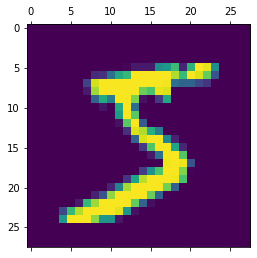

In [60]:
plt.matshow(x_train[0])

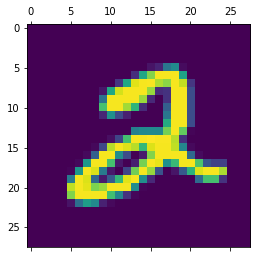

In [61]:
plt.matshow(x_train[5])

In [62]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [64]:
x_train_flattened=x_train.reshape(len(x_train),(28*28))
x_train_flattened=x_train_flattened/255

In [65]:
x_test_flattened=x_test.reshape(len(x_test),(28*28))
x_train_flattened=x_train_flattened/255

In [67]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
      ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2441 - accuracy: 0.4779
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0263 - accuracy: 0.6953
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8344 - accuracy: 0.7337
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6667 - accuracy: 0.7549
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5184 - accuracy: 0.7713
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3904 - accuracy: 0.7825
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2764 - accuracy: 0.7947
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1802 - accuracy: 0.8067
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1023 - accuracy: 0.8136
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.031

In [68]:
y_test_ptedicted=model.predict(x_test_flattened)

In [69]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 18290.9902 - accuracy: 0.7266


[18290.990234375, 0.7265999913215637]

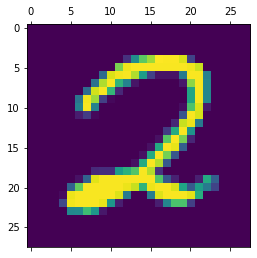

In [78]:
plt.matshow(x_test[35])

In [80]:
np.argmax(y_test_ptedict[35])

1

In [81]:
y_test_ptedicted_label=[np.argmax(i) for i in y_test_ptedicted]

In [82]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_test_ptedicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[974,   0,   2,   3,   0,   0,   1,   0,   0,   0],
       [  1, 981,  78,  58,   0,   3,   6,   0,   8,   0],
       [275,   0, 736,   3,   7,   0,   4,   3,   4,   0],
       [374,   0, 242, 382,   2,   0,   0,   6,   4,   0],
       [110,   0,  88,  63, 671,   0,  15,   3,  32,   0],
       [632,   1,  34, 110,   6,  63,   8,   2,  36,   0],
       [438,   2, 405,  15,   5,   2,  91,   0,   0,   0],
       [160,   5, 128, 159,  56,   2,   2, 506,  10,   0],
       [152,   1, 189, 258,  12,   9,  18,  15, 320,   0],
       [111,   2,  34, 140, 499,   5,   2,  83, 129,   4]])>

Text(69.0, 0.5, 'Truth')

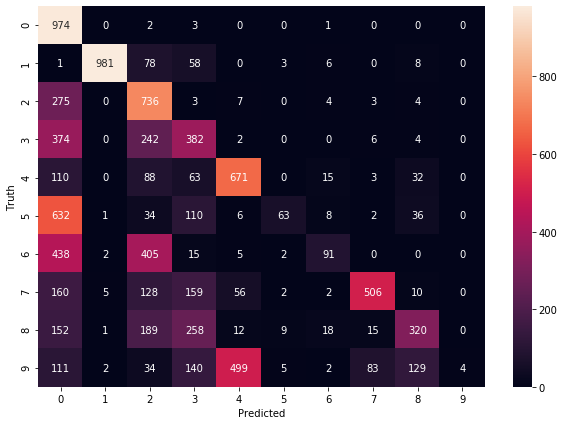

In [83]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Adding Hidden layer

In [92]:
model=keras.Sequential([
    keras.layers.Dense(1000, input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
     ])

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 1.2686 - accuracy: 0.6596
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3603 - accuracy: 0.8976
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2942 - accuracy: 0.9150
Epoch 4/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2689 - accuracy: 0.9223
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2401 - accuracy: 0.9325


In [93]:
y_test_ptedicted=model.predict(x_test_flattened)
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 9508.5869 - accuracy: 0.9104


[9508.5869140625, 0.9103999733924866]

In [94]:
y_test_ptedicted_label=[np.argmax(i) for i in y_test_ptedicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_test_ptedicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    2,    0,    0,    1,    0,    4,    0],
       [   2, 1094,    7,    2,    0,    1,    3,    0,   26,    0],
       [  39,    9,  937,   11,    4,    0,    3,    3,   26,    0],
       [  21,    0,   65,  896,    0,    3,    0,    4,   21,    0],
       [  28,    1,    2,    3,  907,    0,    5,    0,   29,    7],
       [  64,    2,    2,  108,    9,  624,    6,    1,   72,    4],
       [  51,    3,   26,    0,   10,   14,  842,    0,   12,    0],
       [  28,    3,   66,  161,    9,    0,    0,  741,    9,   11],
       [  16,    4,    5,   31,    5,   10,    7,    3,  893,    0],
       [  31,    4,    0,   19,   46,    1,    0,   33,  131,  744]])>

Text(69.0, 0.5, 'Truth')

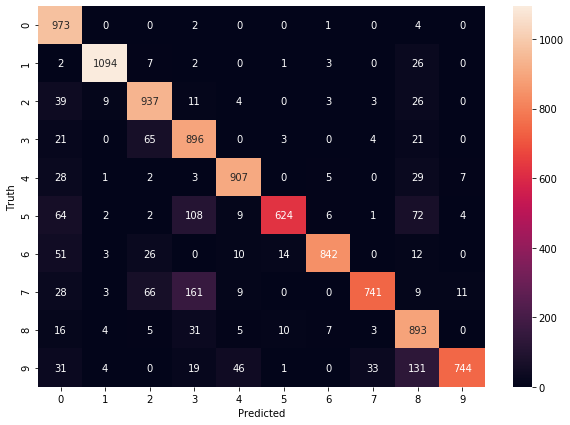

In [95]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [103]:
y_test_ptedicted_label[15:30]

[5, 9, 3, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1]

In [104]:
y_test[15:30]

array([5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1], dtype=uint8)

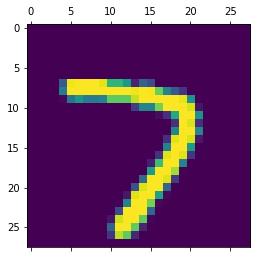

In [105]:
plt.matshow(x_test[17])

## No need to Flatten array 

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28))
    keras.layers.Dense(1000, input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
     ])

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train,y_train,epochs=5)